#### Regression coefficient analysis

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
import pickle
import glob


file_path = '/root/capsule/data/foraging_nwb_bonsai_processed/662914_2023-09-19/662914_2023-09-19_df_session_logistic_regression_df_beta_Su2022.pkl'

In [2]:
with open(file_path, 'rb') as file:
    data = pickle.load(file)
print(data.shape)

(1, 31)


In [3]:
print(data.info())
print(data.index.names)
print(data.columns.names)

for name in data.index.names:
    print(f"Unique values in {name}:", data.index.get_level_values(name).unique())

for name in data.columns.names:
    print(f"Unique values in {name}:", data.columns.get_level_values(name).unique())

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 1 entries, ('662914', '2023-09-19', 0) to ('662914', '2023-09-19', 0)
Data columns (total 31 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   (RewC, 15.0)  1 non-null      float64
 1   (RewC, 14.0)  1 non-null      float64
 2   (RewC, 13.0)  1 non-null      float64
 3   (RewC, 12.0)  1 non-null      float64
 4   (RewC, 11.0)  1 non-null      float64
 5   (RewC, 10.0)  1 non-null      float64
 6   (RewC, 9.0)   1 non-null      float64
 7   (RewC, 8.0)   1 non-null      float64
 8   (RewC, 7.0)   1 non-null      float64
 9   (RewC, 6.0)   1 non-null      float64
 10  (RewC, 5.0)   1 non-null      float64
 11  (RewC, 4.0)   1 non-null      float64
 12  (RewC, 3.0)   1 non-null      float64
 13  (RewC, 2.0)   1 non-null      float64
 14  (RewC, 1.0)   1 non-null      float64
 15  (UnrC, 15.0)  1 non-null      float64
 16  (UnrC, 14.0)  1 non-null      float64
 17  (UnrC, 13.0)  1 non-null 

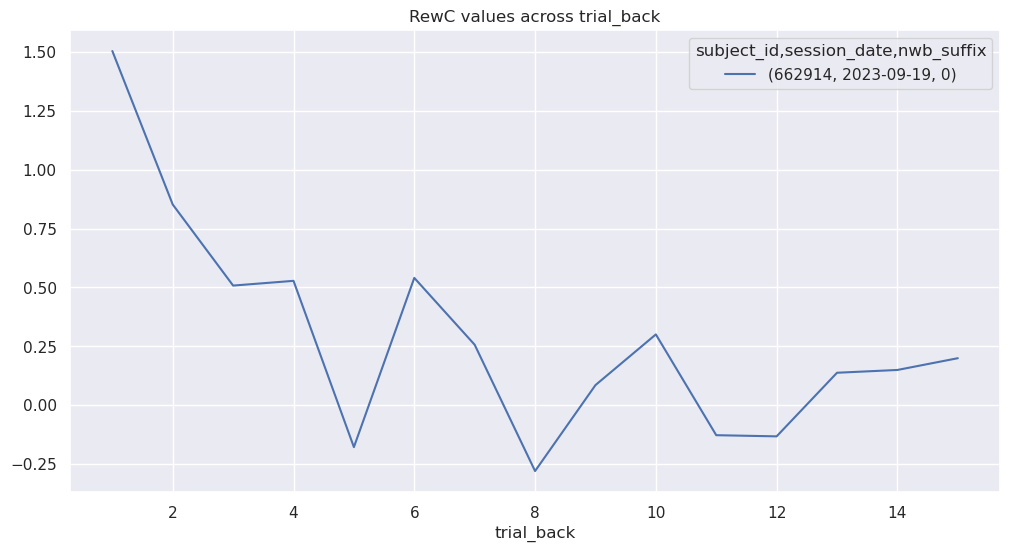

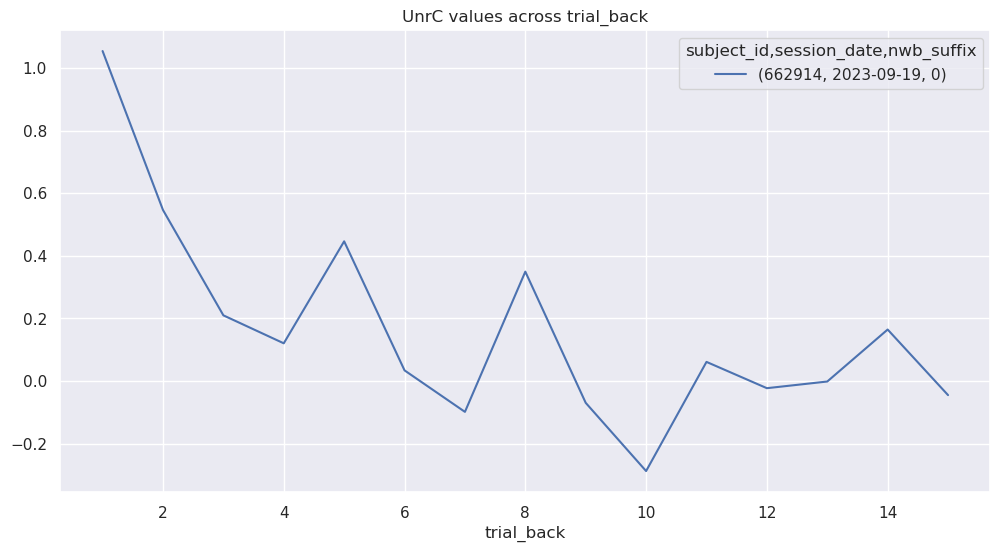

In [4]:
sns.set_theme()

# Plot Rewarded Choice
data['RewC'].T.plot(figsize=(12, 6))
plt.title('RewC values across trial_back')
plt.show()

# Plot Unrewarded Choice
data['UnrC'].T.plot(figsize=(12, 6))
plt.title('UnrC values across trial_back')
plt.show()

In [5]:
def load_pkl_files(base_path):
    """
    Load multiple PKL files from a directory based on the specific folder structure.
    
    :param base_path: The base directory containing subject_id_date folders
    :return: A dictionary of DataFrames, keyed by subject_id_date
    """
    all_data = {}
    
    # Iterate through subject_id_date folders (how pattern is saved in original s3)
    for subject_folder in os.listdir(base_path):
        subject_path = os.path.join(base_path, subject_folder)
        
        # Check if it's a directory
        if os.path.isdir(subject_path):
            # Create expected pattern for filename (specific for Su2022 regression files)
            pkl_filename = f"{subject_folder}_df_session_logistic_regression_df_beta_Su2022.pkl"
            pkl_path = os.path.join(subject_path, pkl_filename)
            
            # Check if the file exists
            if os.path.exists(pkl_path):
                try:
                    # Load the pkl file
                    with open(pkl_path, 'rb') as file:
                        data = pickle.load(file)
                    
                    all_data[subject_folder] = data
                    print(f"Loaded: {pkl_path}")
                except Exception as e:
                    print(f"Error loading {pkl_path}: {str(e)}")
            else:
                print(f"File not found: {pkl_path}")
    
    return all_data

In [6]:
# Example usage - est. time 5min
base_path = '/root/capsule/data/foraging_nwb_bonsai_processed'

loaded_data = load_pkl_files(base_path)

File not found: /root/capsule/data/foraging_nwb_bonsai_processed/1_2024-08-05_151618/1_2024-08-05_151618_df_session_logistic_regression_df_beta_Su2022.pkl
File not found: /root/capsule/data/foraging_nwb_bonsai_processed/1_2024-08-05_154854/1_2024-08-05_154854_df_session_logistic_regression_df_beta_Su2022.pkl
File not found: /root/capsule/data/foraging_nwb_bonsai_processed/1_2024-08-09_144109/1_2024-08-09_144109_df_session_logistic_regression_df_beta_Su2022.pkl
File not found: /root/capsule/data/foraging_nwb_bonsai_processed/1_2024-08-19_113534/1_2024-08-19_113534_df_session_logistic_regression_df_beta_Su2022.pkl
File not found: /root/capsule/data/foraging_nwb_bonsai_processed/1_2024-08-30_152052/1_2024-08-30_152052_df_session_logistic_regression_df_beta_Su2022.pkl
File not found: /root/capsule/data/foraging_nwb_bonsai_processed/1_2024-09-16_151532/1_2024-09-16_151532_df_session_logistic_regression_df_beta_Su2022.pkl
File not found: /root/capsule/data/foraging_nwb_bonsai_processed/1_202

In [7]:
print(f'\n loaded {len(loaded_data)} files')

if loaded_data:
    first_key = next(iter(loaded_data))
    first_df = loaded_data[first_key]
    print(first_df.head())


 loaded 5170 files
var                                     RewC                                \
trial_back                                15        14        13        12   
subject_id session_date nwb_suffix                                           
662914     2023-09-19   0           0.199354  0.149425  0.137578 -0.132473   

var                                                                        \
trial_back                                11        10        9        8    
subject_id session_date nwb_suffix                                          
662914     2023-09-19   0          -0.127538  0.300339  0.085108 -0.27977   

var                                                     ...      UnrC  \
trial_back                                7         6   ...        9    
subject_id session_date nwb_suffix                      ...             
662914     2023-09-19   0           0.256459  0.540352  ... -0.069841   

var                                                              

In [8]:
def filter_dict(df_dict, subject_id):
    """
    Filter the dictionary for a specific subject 
    Returns filtered dictionary containng only entries for that subject_id
    """

    filtered_dict = {
        key: df for key, df in df_dict.items()
        if key.split('_')[0] == str(subject_id)
    }

    return filtered_dict


In [17]:
test_subject_dict = filter_dict(loaded_data, '750108')

In [18]:
test_subject_dict.keys()

dict_keys(['750108_2024-09-09_93401', '750108_2024-09-11_91445', '750108_2024-09-12_92141', '750108_2024-09-13_84003', '750108_2024-09-16_92657', '750108_2024-09-18_92113', '750108_2024-09-19_91405', '750108_2024-09-20_90453', '750108_2024-09-25_105008', '750108_2024-09-26_91157', '750108_2024-09-27_94833', '750108_2024-10-02_92408', '750108_2024-10-03_90751', '750108_2024-10-04_91538'])

In [19]:
def extract_coeffs(df_dict, trial_back_value):
    """
    Extract logistic regression coefficients for both rewarded and unrewarded trials. 
    Returns dataframe indexed with dates and columns = RewC or UnrC
    """ 

    dates = []
    rewc_values = []
    unrc_values = []

    for key, df in df_dict.items():

        # Extract date from key 
        date = key.split('_')[-1]

        try:
            rewc_value = df[('RewC', trial_back_value)].iloc[0]
            unrc_value = df[('UnrC', trial_back_value)].iloc[0]

            # Append values
            dates.append(date)
            rewc_values.append(rewc_value)
            unrc_values.append(unrc_value)

        except (KeyError, IndexError) as e:
            print(f'could not find coefficients for {date} at {trial_back_value}')
            print(f'error: {str(e)}')
            continue

    result_df = pd.DataFrame({
        'RewC': rewc_values,
        'UnrC': unrc_values
    }, index=dates)

    result_df.sort_index(inplace=True)

    return result_df

In [20]:
trial_back = 2

result = extract_coeffs(test_subject_dict, trial_back)

In [21]:
# Could iterate through different subjects or trial_back values or could average 
result

,RewC,UnrC
105008,1.111929,0.259977
84003,0.920730,0.479214
90453,0.618723,0.406137
90751,1.141892,0.432058
91157,1.231217,0.706604
91405,0.930635,0.729774
91445,0.675068,0.156020
91538,1.369981,0.501845
92113,0.003310,0.009108
92141,0.661207,0.127738


<Axes: xlabel='None', ylabel='RewC'>

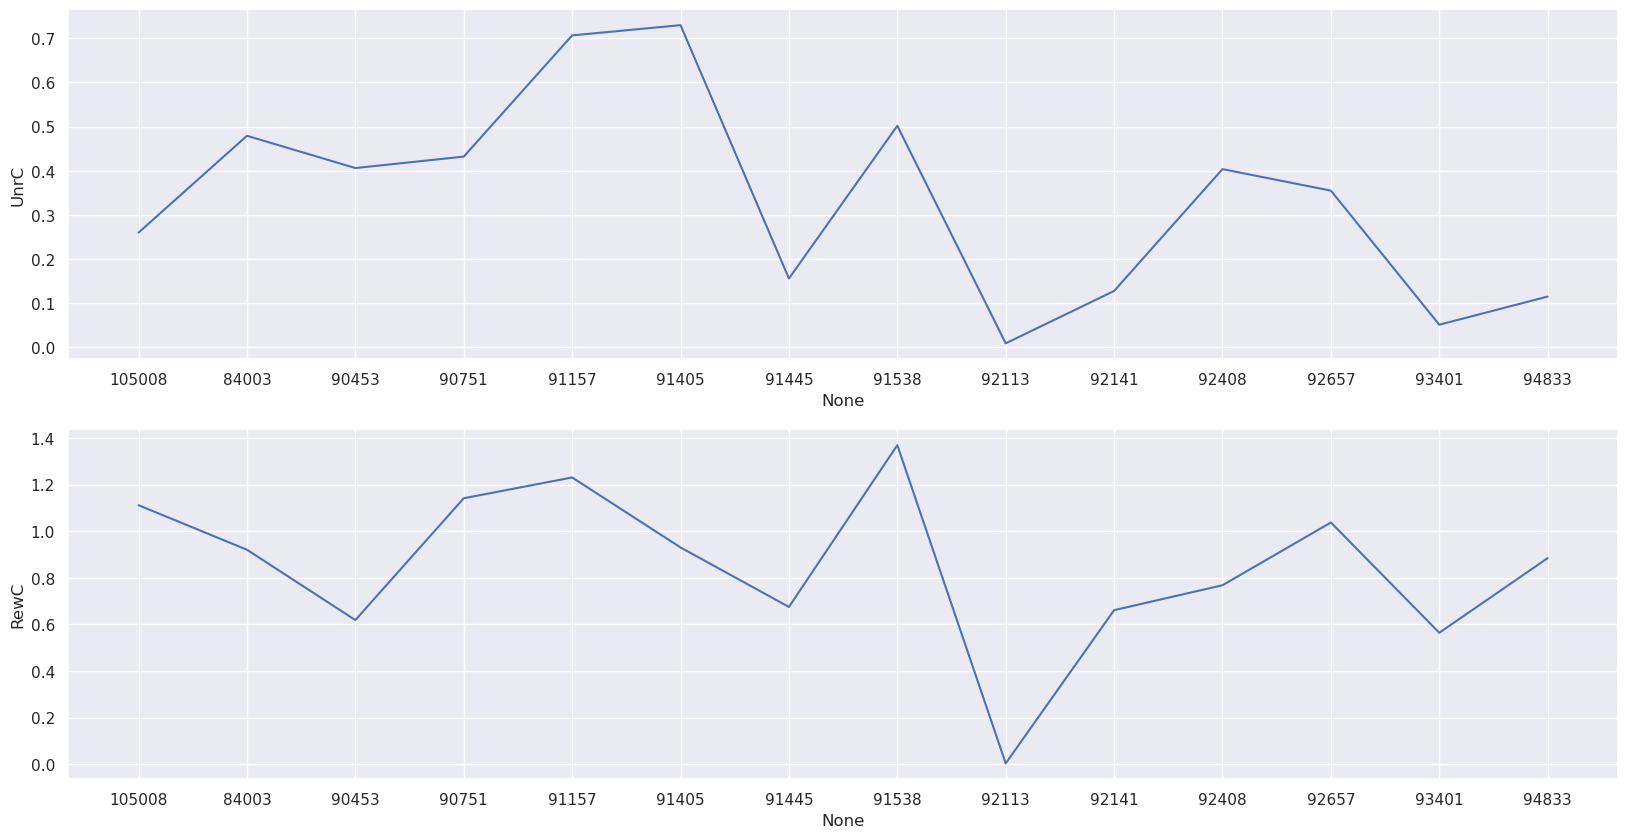

In [22]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 10))

sns.lineplot(data=result, x=result.index, y='UnrC', ax=ax1)

sns.lineplot(data=result, x=result.index, y='RewC', ax=ax2)